
=================================================================================================================
# Course         :FA22: INTRO TO NLP FOR DATA SCIENCE: 11691 

# Assignment     :Week-7 Final Project – Phase-1 

# Project Title  :Sentiment Analyzer for Trip Advisor Hotels Reviews 

# Team Members  :1. Bhavika Sharma  2. Keerti Kolakaluri  3. Sridhar Reddy Sama 

# Submission Date  10/23/2022 
================================================================================================================




# A brief introduction

Based on customer hotel experience, we will explore hotel reviews and ratings in this project. Additionally, we'll investigate feature engineering and how sentiment analysis depends on ratings. Further, we use NLP tools for feature extraction and preparing data for Natural Language Processing.

## Tripadvisor Overview
Tripadvisor, Inc. is an American online travel company that operates a website, mobile app, and comparison shopping site with user-generated content. It also provides online hotel reservations and bookings for transportation, lodging, travel experiences, and restaurants. Massachusetts is where its headquarters exists.  

## Dataset summary
With the increase in information available, travelers can select hotels in new ways based on a variety of factors.
Through the analysis of 70k reviews from Tripadvisor, customers can learn what makes a great hotel and maybe even use it on their next vacation.

## Todolist
- [x] Preprocessing 
- [x] Data Exploration
- [x] Data Visualization
- [x] WordClouds
- [x] Adding Keywords (Gensim)
- [x] Text Processing (NLTK)
- [x] Creating BiLSTM Model
- [X] Hyperparameters Tuning
- [x] Train and validation
- [x] Metrics / Model Performance
- [X] Sentiment Analysis
- [x] Saving Model
- [x] Final thoughts

================================================================================
Step-1 : by Sridhar Reddy Sama
================================================================================
# Data preprocessing

This step filters reviews to obtain only those that are useful for recommendation purposes. Following are the steps taken to clean the data and prepare it for recommendation:

Removing empty user reviews: Blank user IDs are removed.
Remove ratings with some of the rating criteria missing: We remove records with these rating criteria missing. To obtain significant measures, it is essential to have all requirements met. Failure to do so can complicate the linear regression performed.
Remove single-review hotels: Hotels with only one review have been removed from the list.
Remove users with low reviews: We remove users with fewer than 10 reviews.
Drop unnecessary fields: Some fields, such as the review text, are removed from records.
Include extra fields: To simplify data manipulation, we add some additional fields; for this dataset, the user ID is included at the top level.

In [4]:
!pip install tensorflow
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.7 MB/s 


In [5]:
## All purpose
import pandas as pd 
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

## NLP
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
from gensim.summarization import keywords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

## Deeplearning/ML
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
# Creating sentimental polarity 
analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

In [27]:
!rm review*
from google.colab import files
uploaded = files.upload()

Saving review.csv to review.csv


In [50]:
## Importing CSV file
df_rating = pd.read_csv("review.csv")
df_rating.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (3,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.



,Ratings_overall,Title,Review,Author_username,Author_location,date_stayed,offering_id,id
0,5,"Truly is ""Jewel of the Upper Wets Side""",Stayed in a king suite for 11 nights and yes i...,Papa_Panda,Gold Coast,Dec-12,93338,147643103
1,5,My home away from home!,"On every visit to NYC, the Hotel Beacon is the...",Maureen V,"Sydney, New South Wales, Australia",Dec-12,93338,147639004
2,4,Great Stay,This is a great property in Midtown. We two di...,vuguru,Houston,Dec-12,1762573,147697954
3,4,Modern Convenience,The Andaz is a nice hotel in a central locatio...,Hotel-Designer,"Laguna Beach, CA",Aug-12,1762573,147625723
4,4,Its the best of the Andaz Brand in the US....,I have stayed at each of the US Andaz properti...,JamesE339,"Saint Louis, Missouri",Dec-12,1762573,147612823


In [51]:

# ## Applying Compund score
polarity_scores = df_rating["Review"].astype("str").apply(compound_score)
df_rating["Sentiment_Score"] = polarity_scores

# ## Applying Sentiment
df_rating["Sentiment"] = df_rating["Sentiment_Score"].apply(sentiment)

In [52]:
df_rating.head()

,Ratings_overall,Title,Review,Author_username,Author_location,date_stayed,offering_id,id,Sentiment_Score,Sentiment
0,5,"Truly is ""Jewel of the Upper Wets Side""",Stayed in a king suite for 11 nights and yes i...,Papa_Panda,Gold Coast,Dec-12,93338,147643103,0.9966,Positive
1,5,My home away from home!,"On every visit to NYC, the Hotel Beacon is the...",Maureen V,"Sydney, New South Wales, Australia",Dec-12,93338,147639004,0.9802,Positive
2,4,Great Stay,This is a great property in Midtown. We two di...,vuguru,Houston,Dec-12,1762573,147697954,0.9726,Positive
3,4,Modern Convenience,The Andaz is a nice hotel in a central locatio...,Hotel-Designer,"Laguna Beach, CA",Aug-12,1762573,147625723,0.9579,Positive
4,4,Its the best of the Andaz Brand in the US....,I have stayed at each of the US Andaz properti...,JamesE339,"Saint Louis, Missouri",Dec-12,1762573,147612823,0.9939,Positive


In [53]:
## Saving preprocessed file 
df_rating.to_csv("Trip-Advisor-rating-sentiments.csv",index=False)
df_rating.Sentiment.value_counts()

Positive    38436
Neutral     26610
Negative     4951
Name: Sentiment, dtype: int64

In [54]:
# Importing the Trip-Advisor-Hotel-Review Dataset
data_rating=pd.read_csv('Trip-Advisor-rating-sentiments.csv')

# Having a look at the data
data_rating.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (3,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.



,Ratings_overall,Title,Review,Author_username,Author_location,date_stayed,offering_id,id,Sentiment_Score,Sentiment
0,5,"Truly is ""Jewel of the Upper Wets Side""",Stayed in a king suite for 11 nights and yes i...,Papa_Panda,Gold Coast,Dec-12,93338,147643103,0.9966,Positive
1,5,My home away from home!,"On every visit to NYC, the Hotel Beacon is the...",Maureen V,"Sydney, New South Wales, Australia",Dec-12,93338,147639004,0.9802,Positive
2,4,Great Stay,This is a great property in Midtown. We two di...,vuguru,Houston,Dec-12,1762573,147697954,0.9726,Positive
3,4,Modern Convenience,The Andaz is a nice hotel in a central locatio...,Hotel-Designer,"Laguna Beach, CA",Aug-12,1762573,147625723,0.9579,Positive
4,4,Its the best of the Andaz Brand in the US....,I have stayed at each of the US Andaz properti...,JamesE339,"Saint Louis, Missouri",Dec-12,1762573,147612823,0.9939,Positive


Checking Missing Values
No missing data in our dataset.

data.isna().sum()

In [55]:
data_rating.isna().sum()

Ratings_overall        0
Title                  0
Review              3725
Author_username    10315
Author_location     7737
date_stayed         2962
offering_id            0
id                  5454
Sentiment_Score        0
Sentiment              0
dtype: int64

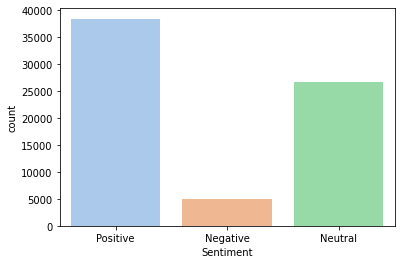

In [57]:
sns.countplot(data=data_rating,x="Sentiment",palette="pastel");

In [58]:
# Preparing data for visualization 
Viz_1 = data_rating[['Ratings_overall','Sentiment']].value_counts().rename_axis(['Ratings_overall','Sentiment']).reset_index(name='counts')

# Plotting the Bar Graph 
fig = px.bar(x=Viz_1.Ratings_overall, y=Viz_1.counts, color=Viz_1.Sentiment,color_discrete_sequence=px.colors.qualitative.Pastel,title="Sentiment & Ratings",labels={'x':'Ratings','y':'Total Number'})
fig.show()

In [59]:
#Viz2 Data preparation 
Viz_2 = data_rating['Ratings_overall'].value_counts().rename_axis(['Ratings_overall']).reset_index(name='counts')
    
# Plotting  pie chart for ratings
fig_pie = px.pie(values=Viz_2.counts, names=Viz_2.Ratings_overall, title='Rating Distribution of the data',color_discrete_sequence=px.colors.qualitative.Pastel)
fig_pie.show()

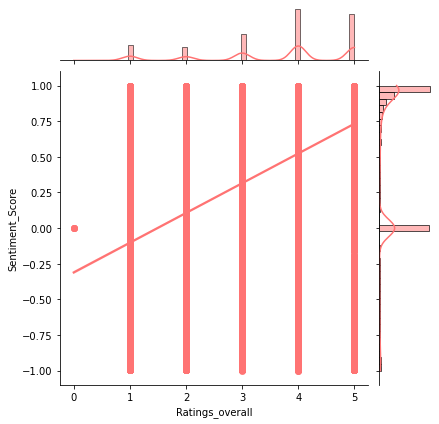

In [61]:
# Jointplot on the basis of Rating and Sentiment Score of the data
jp = sns.jointplot(data=data_rating,x='Ratings_overall',y='Sentiment_Score',kind="reg",color='#ff7373')
# jp.fig.suptitle('Jointplot on the basis of Rating and Sentiment Score of the data',fontsize=20);

## A word cloud displaying all three sentiments
The hotel room was the most commonly used word in all three Sentiments. There is no doubt that hotel managers can choose whether to improve their customer rating. 

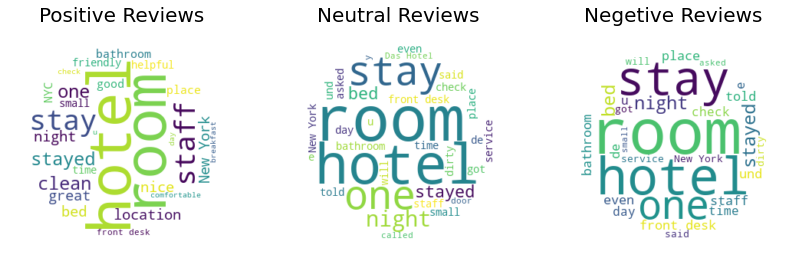

In [62]:
# Getting all the reviews termed positive in a single string and forming a word cloud of the string
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[14, 14], facecolor = None)

text1 =''
for i in data_rating[data_rating['Sentiment']=='Positive']['Review'].values:
    text1+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc1 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc1.generate(text1)

ax1.axis("off")
ax1.imshow(wc1, interpolation="bilinear")
ax1.set_title('Positive Reviews',fontsize=20);

text2 =''
for i in data_rating[data_rating['Sentiment']=='Negative']['Review'].values:
    text2+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc2 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc2.generate(text2)

ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title('Neutral Reviews',fontsize=20);

text3 =''
for i in data_rating[data_rating['Sentiment']=='Negative']['Review'].values:
    text3+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc3 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc3.generate(text3)

ax3.axis("off")
ax3.imshow(wc3, interpolation="bilinear")
ax3.set_title('Negetive Reviews',fontsize=20);

plt.show()

## Wordcloud of all five ratings
There is little difference between them, so whatever the situation, people mainly refer to hotels and days rated from 1-5 stars.

================================================================================
Step-2 : by Keerti Kolakaluri
================================================================================



================================================================================
Step-3 : by Bhavika Sharma
================================================================================




